Домашнее задание:

К вам приходит руководитель продукта “Интернет-магазин”

И спрашивает про удержание клиентов и повторные покупки. У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи

Он просит вас сравнить, на сколько сейчас все хуже, чем в прошлом году? 

Данные лежат в папке занятия на сервере:

есть транзакции (покупки) в интернет магазине, в том числе id клиента, id покупки, timestamp покупки и тп
orders.csv, customers.csv

Ваши задачи: 

1) Проверить гипотезу руководителя продукта 

2) Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы

Ответ может быть в любом формате 

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
customers =  pd.read_csv('customers.csv')

In [6]:
customers

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [7]:
orders =  pd.read_csv('orders.csv')

In [8]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


Добавим колонки в датафрейм с месяцем и годом заказа

In [9]:
orders = orders.drop_duplicates()
orders['OrderDate'] = pd.to_datetime(orders['order_date'],infer_datetime_format=True)
orders['OrderMonth'] = orders['OrderDate'].dt.strftime('%Y-%m') 
orders['OrderYear'] = orders['OrderDate'].dt.strftime('%Y') 

orders.head()

,id,order_date,ship_mode,customer_id,sales,OrderDate,OrderMonth,OrderYear
0,100006,2014-09-07,Standard,DK-13375,377.970,2014-09-07,2014-09,2014
1,100090,2014-07-08,Standard,EB-13705,699.192,2014-07-08,2014-07,2014
2,100293,2014-03-14,Standard,NF-18475,91.056,2014-03-14,2014-03,2014
3,100328,2014-01-28,Standard,JC-15340,3.928,2014-01-28,2014-01,2014
4,100363,2014-04-08,Standard,JM-15655,21.376,2014-04-08,2014-04,2014


Так как нас просят сравнить текущий и предыдущий год, то удалим заказы, сделанные до 2016 года.

In [18]:
orders_2016 = orders[orders['OrderYear'] < '2017' ]
orders_2016 = orders_2016[orders_2016['OrderYear'] >= '2016' ]

In [19]:
orders_2016

,id,order_date,ship_mode,customer_id,sales,OrderDate,OrderMonth,OrderYear
1699,100041,2016-11-20,Standard,BF-10975,328.540,2016-11-20,2016-11,2016
1700,100083,2016-11-24,Standard,CD-11980,24.784,2016-11-24,2016-11,2016
1701,100153,2016-12-13,Standard,KH-16630,63.880,2016-12-13,2016-12,2016
1702,100244,2016-09-20,Standard,GM-14695,475.694,2016-09-20,2016-09,2016
1703,100300,2016-06-24,Second,MJ-17740,4823.090,2016-06-24,2016-06,2016
...,...,...,...,...,...,...,...,...
4715,168620,2016-12-24,Second,RB-19795,823.610,2016-12-24,2016-12,2016
4716,169040,2016-12-06,Standard,GT-14710,1169.454,2016-12-06,2016-12,2016
4717,169369,2016-12-12,Standard,EC-14050,299.070,2016-12-12,2016-12,2016
4745,105830,2016-12-31,First,DB-13660,156.512,2016-12-31,2016-12,2016


In [20]:
orders_2017 = orders[orders['OrderYear'] >= '2017' ]

In [21]:
orders_2017

,id,order_date,ship_mode,customer_id,sales,OrderDate,OrderMonth,OrderYear
2794,100013,2017-11-06,Standard,ZC-21910,29.690,2017-11-06,2017-11,2017
2795,100055,2017-05-28,Standard,MD-17860,152.590,2017-05-28,2017-05,2017
2796,100097,2017-11-26,Second,MN-17935,1115.250,2017-11-26,2017-11,2017
2797,100111,2017-09-20,Standard,SV-20365,7359.918,2017-09-20,2017-09,2017
2798,100160,2017-09-07,Standard,CB-12025,49.688,2017-09-07,2017-09,2017
...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,2017-11-03,2017-11,2017
5005,169320,2017-07-23,Second,LH-16900,171.430,2017-07-23,2017-07,2017
5006,169488,2017-09-07,First,AA-10375,56.860,2017-09-07,2017-09,2017
5007,169502,2017-08-28,Standard,MG-17650,113.410,2017-08-28,2017-08,2017


Сперва посмотрим, упали ли продажи:

In [22]:
orders_2017['sales'].sum()

733215.2552

In [24]:
orders_2016['sales'].sum()

609205.598

In [25]:
orders_2017['sales'].sum()/orders_2016['sales'].sum()

1.2035596153533705

Как видим, продажи в 2017 году выросли на 20%

Теперь проведем когортный анализ по 2016 и 2017 году и посмотрим на retention rate

In [29]:
cohorts_2016= orders_2016.groupby('customer_id',as_index=False)['OrderMonth'].min()
cohorts_2016.rename(columns = {'OrderMonth':'Cohort'},inplace=True)
cohorts_2016.head()

,customer_id,Cohort
0,AA-10315,2016-03
1,AA-10375,2016-07
2,AA-10480,2016-07
3,AA-10645,2016-07
4,AB-10015,2016-11


In [30]:
orders_2016_merged= pd.merge(orders_2016, cohorts_2016 , how='left', on='customer_id')
orders_2016_merged.head()

,id,order_date,ship_mode,customer_id,sales,OrderDate,OrderMonth,OrderYear,Cohort
0,100041,2016-11-20,Standard,BF-10975,328.540,2016-11-20,2016-11,2016,2016-11
1,100083,2016-11-24,Standard,CD-11980,24.784,2016-11-24,2016-11,2016,2016-11
2,100153,2016-12-13,Standard,KH-16630,63.880,2016-12-13,2016-12,2016,2016-07
3,100244,2016-09-20,Standard,GM-14695,475.694,2016-09-20,2016-09,2016,2016-09
4,100300,2016-06-24,Second,MJ-17740,4823.090,2016-06-24,2016-06,2016,2016-04


In [32]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [33]:
cohorts_group_2016 = orders_2016_merged.groupby(['Cohort', 'OrderMonth']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2016.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2016 = cohorts_group_2016.groupby(level=0).apply(cohort_period)
cohorts_group_2016.reset_index(inplace=True)
cohorts_group_2016.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_2016_size = cohorts_group_2016['TotalUsers'].groupby(level=0).first()
user_retention_2016 = cohorts_group_2016['TotalUsers'].unstack(0).divide(cohort_group_2016_size, axis=1)

In [36]:
cohorts_2017= orders_2017.groupby('customer_id',as_index=False)['OrderMonth'].min()
cohorts_2017.rename(columns = {'OrderMonth':'Cohort'},inplace=True)
cohorts_2017.head()

,customer_id,Cohort
0,AA-10315,2017-06
1,AA-10375,2017-09
2,AA-10480,2017-04
3,AA-10645,2017-11
4,AB-10060,2017-05


In [37]:
orders_2017_merged= pd.merge(orders_2017, cohorts_2017 , how='left', on='customer_id')
orders_2017_merged.head()

,id,order_date,ship_mode,customer_id,sales,OrderDate,OrderMonth,OrderYear,Cohort
0,100013,2017-11-06,Standard,ZC-21910,29.690,2017-11-06,2017-11,2017,2017-05
1,100055,2017-05-28,Standard,MD-17860,152.590,2017-05-28,2017-05,2017,2017-05
2,100097,2017-11-26,Second,MN-17935,1115.250,2017-11-26,2017-11,2017,2017-02
3,100111,2017-09-20,Standard,SV-20365,7359.918,2017-09-20,2017-09,2017,2017-07
4,100160,2017-09-07,Standard,CB-12025,49.688,2017-09-07,2017-09,2017,2017-02


In [38]:
cohorts_group_2017 = orders_2017_merged.groupby(['Cohort', 'OrderMonth']).agg({'customer_id': pd.Series.nunique})
cohorts_group_2017.rename(columns={'customer_id': 'TotalUsers',
                        'id': 'TotalOrders'}, inplace=True)
cohorts_group_2017 = cohorts_group_2017.groupby(level=0).apply(cohort_period)
cohorts_group_2017.reset_index(inplace=True)
cohorts_group_2017.set_index(['Cohort', 'CohortPeriod'], inplace=True) 
cohort_group_2017_size = cohorts_group_2017['TotalUsers'].groupby(level=0).first()
user_retention_2017 = cohorts_group_2017['TotalUsers'].unstack(0).divide(cohort_group_2017_size, axis=1)

### 2016 год

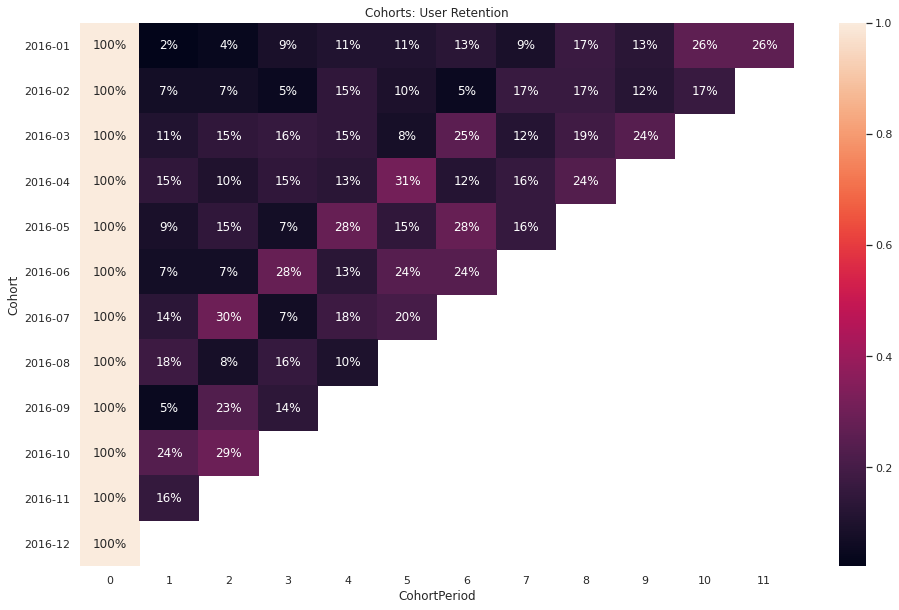

In [34]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_2016.T, mask=user_retention_2016.T.isnull(), annot=True, fmt='.0%');

### 2017 год

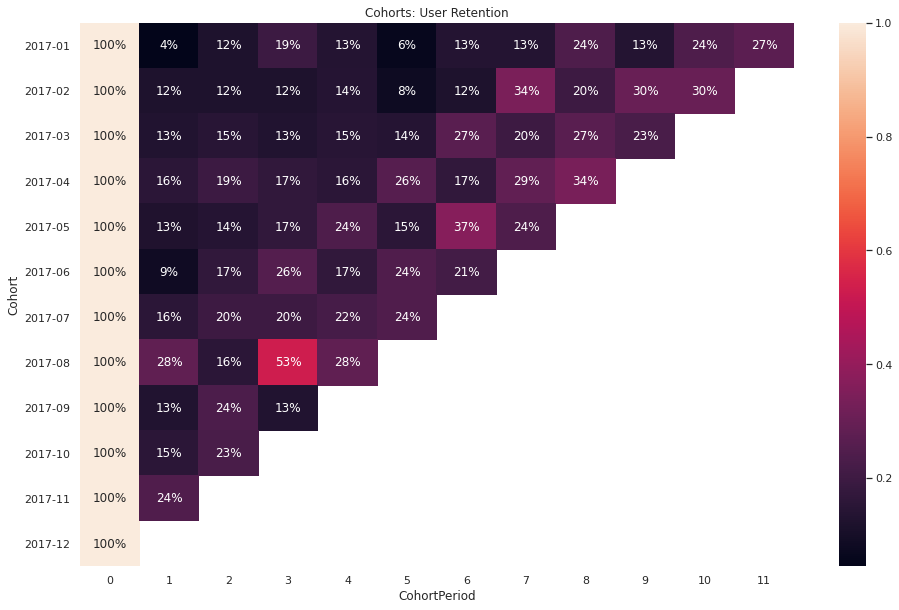

In [39]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention_2017.T, mask=user_retention_2017.T.isnull(), annot=True, fmt='.0%');

Итак, какие выводы, глядя на таблицы мы можем сделать?

1) В бизнесе присутствует явная сезонность. Очень хорошо прокрашивается 9я диагональ. Начиная с нее Retention увеличивается к концу года, после чего заметно падает.

2) В 2017 году компания сделала что-то хорошее в 7м месяце, после которого значения retention выгодно отличается по сравнению с 2016.

3) Retention rate за 2017 год выше, чем за 2016.

Выводы:

1) Отток пользователей за 2017 стал меньше.

2) Число продаж (sales) увеличилось на 20%

Значит гипотеза не верна, все в порядке.
    

P.S. Если для нас некоторые категории клиентов/варианты доставки важны больше других, то можно отдельно провести анализ по ним, сейчас я в этом смысла не вижу, для ответа на поставлнную задачу.